# Investigation into how the U.K. climate is changing using data analysis
Adapting to climate change is a government priority. The government has taken some action to adapt by committing to reduce greenhouse gas emissions to net zero by 2050. In this report I created models which investigated how the climate in the U.K. is changing in accordance to 3 factors.

• Monthly mean temperatures

• Monthly rainfall

• Hours of sunshine

### 1. Data collection

Data was collected from the Met Office’s historic station data [1] which includes 37 weather stations around the U.K to produce models that reveal changes in climate between 1990 and 2018. 

Climate change is the long-term change of expected weather patterns with a major concern in recent times being an increase in temperature. To find out how the climate changed in the UK an overall average was calculated. For example temperatures in the south of England will vastly vary to the north of Scotland and each of these areas cannot be indicative for climate change over the entire U.K. A relevant timeframe was also a consideration and this was one that included recent years up to and including 2018 as we are seeing how the climate has changed up to this modern day. For the starting date; this investigation is supposed to relate the findings to the governments actions one being the UK’s commitment to become carbon neutral by 2050. However, by looking at the previous target of reducing carbon emissions by 80% in 2050 from 1990 [2], 1990 can be seen as the year to start collating our data as the government took initiative to adapt to the climate from the greenhouse emissions of that year. In addition there is correlation between a decrease in mean temperatures and a decrease in greenhouse emissions and vice versa [3] so if the data analysis finds that mean temperatures have decreased since 1990 this could be indicative of a reduction in greenhouse gas emissions which falls in line with the governments targets or vice versa. 2019 data will not be used in this analysis as the data for this year is still provisional. Stations which have closed before 2018 will also not be in consideration as no recent data will be available.

As the U.K. comprises of England, Scotland, Wales and Northern Ireland it’s reasonable to receive data from at least one station from one of these 4 areas to represent their respective climates. The most accurate way to find a U.K. average would be to get an average from all the stations available within the met office database however due to the time constraints within the task this is not feasible, so an intelligent selection is crucial. We can do this by considering the land area of each country within the U.K. The areas of Northern Ireland, Wales, Scotland and England respectively are 13,562km, 20,735km, 77,933km and 130,279km [4]. Wales is just over 40% bigger than Northern Ireland and Scotland is around 4 times bigger than wales with the U.K. just over 60% bigger than the Scotland. Although Wales is bigger than Northern Ireland they are relatively small and similar in scale so it’s reasonable to get data from only one station from each of these areas. England is just over 6 times bigger than wales so it would make sense to get 6 stations from England to be proportionate however since the climate in England will be similar in the South, Midlands and the North compared to for example the midlands and wales as wales is on average at a much higher altitude so the climate will vary a lot more 3 stations would be representative of the climate overall in England with one station in the south, midlands and the north. A similar logic can be applied to Scotland however since its about 40% smaller than England 2 stations can be representative of Scotland with a line in the middle of the country separating one station for the south of Scotland and one for the north of Scotland. So as a recap:

• Data will be collected from 1990-2018 so any stations which have closed before 2018 will not be considered.

• 1 station for northern island

• 1 for wales

• 2 for Scotland

• 3 for England

• 7 in total

The link to the met office historic station data mentions that there are estimated values in the data for each station because of this some data cleaning maybe required as only recorded values are going to be used for the analysis. By inspection of the historic station data the 7 stations chosen were Oxford for the south of England, Waddington-midlands, Durham-north of England, Paisley-south of Scotland, Nairn-north of Scotland, Aberporth-wales and Armagh-Northern Ireland. The data for these stations were pasted into google sheets and saved as csv files.


In [176]:
#Relevant libraries which will be needed for the investigation
import import_ipynb
import pandas as pd
import numpy as np
import scipy as sp
import requests

In [177]:
oxford = pd.read_csv('oxford weather.csv')
oxford

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1853,1,8.4,2.7,4,62.8,---,NaN
1,1853,2,3.2,-1.8,19,29.3,---,NaN
2,1853,3,7.7,-0.6,20,25.9,---,NaN
3,1853,4,12.6,4.5,0,60.1,---,NaN
4,1853,5,16.8,6.1,0,59.5,---,NaN
...,...,...,...,...,...,...,...,...
1998,2019,7,24.1*,13.9*,0*,36.0*,209.7*,Provisional
1999,2019,8,23.9,13.2,0,46.9,202.5,Provisional
2000,2019,9,20.8,10.4,0,62.9,176,Provisional
2001,2019,10,14.6,7.5,0,116.2,80.7,Provisional


When looking at each column 'yyyy' represents year, 'mm' month, 'tmax_degC' mean daily maximum temperature, 'tmindegC' mean daily minimum temperature, 'af_days' days of aitfrost and 'sun_hours' total sunshine hours.

In [178]:
oxford.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [179]:
oxford.dtypes

yyyy           int64
mm             int64
tmax_degC     object
tmin_degC     object
af_days       object
rain_mm       object
sun_hours     object
Unnamed: 7    object
dtype: object

### 2.1 Data cleansing process
We can see that the 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm' and 'sun_hours' columns aren’t of the type float64 which we would expect when looking at the table. This must mean that there are predicted values denoted by a * and maybe null values as well. There is also an irrelevant column 'af days' and years before 1990 and the 2019 figures which are provisional so before any analysis took place there was some data cleansing. This was done by getting rid of the predicted values in the data tables, removing the 'af_days' column and removing the 2019 year and the years before 1990.

In [180]:
#This code removes the af days column and all the years before 1990 and the 2019 year 
oxford = oxford.drop(oxford.index[1992:2003])
oxford = oxford.drop(oxford.index[0:1644])
oxford = oxford.drop(oxford.columns[[4,7]],axis=1)
oxford

,yyyy,mm,tmax_degC,tmin_degC,rain_mm,sun_hours
1644,1990,1,10,4.5,75,58.3
1645,1990,2,11.3,5.3,94.2,95.7
1646,1990,3,12.7,5,18.4,144.1
1647,1990,4,13.7,3.3,20.4,234.4
1648,1990,5,19.2,7.8,8.7,285
...,...,...,...,...,...,...
1987,2018,8,23.4,13.2*,43.2,198.6
1988,2018,9,20.4,10,30.3,169.8
1989,2018,10,15.6,7.3,50.1,117.3
1990,2018,11,11.7,5.5,61.9,82.7


In [181]:
#This code converts any non numerical value such as estimates which are denoted by * into null values and also shows the total 
#number of null values getting rid of any uncertainty in using estimates in this study as only recorded values are going to be 
#used. When averaging if a null value is in a row the pandas library ignores this and an average can still be achieved.
oxford['tmin_degC'] = pd.to_numeric(oxford['tmin_degC'], errors='coerce')
oxford['tmax_degC'] = pd.to_numeric(oxford['tmax_degC'], errors='coerce')
oxford['sun_hours'] = pd.to_numeric(oxford['sun_hours'], errors='coerce')
oxford['rain_mm'] = pd.to_numeric(oxford['rain_mm'], errors='coerce')
oxford.isnull().sum()

yyyy          0
mm            0
tmax_degC     9
tmin_degC     6
rain_mm      19
sun_hours    11
dtype: int64

In [182]:
oxford.dtypes

yyyy           int64
mm             int64
tmax_degC    float64
tmin_degC    float64
rain_mm      float64
sun_hours    float64
dtype: object

All the relevant rows were converted to floats this meant that the mean temperature could now be found

In [183]:
#I have run this code to find the mean temeratures in Oxford per month as we are only given the minimum and maximum 
#temperatures and this task requires me to find the mean temperatures accross the U.K. I have also goteen rid of the 
#'tmax degC' and 'tmin degC' columns as these are now irrelevent to the task.
oxford['tmean_degC'] = oxford[['tmax_degC', 'tmin_degC']].mean(axis=1)
oxford = oxford.drop(oxford.columns[[2,3]],axis=1)
oxford

,yyyy,mm,rain_mm,sun_hours,tmean_degC
1644,1990,1,75.0,58.3,7.25
1645,1990,2,94.2,95.7,8.30
1646,1990,3,18.4,144.1,8.85
1647,1990,4,20.4,234.4,8.50
1648,1990,5,8.7,285.0,13.50
...,...,...,...,...,...
1987,2018,8,43.2,198.6,23.40
1988,2018,9,30.3,169.8,15.20
1989,2018,10,50.1,117.3,11.45
1990,2018,11,61.9,82.7,8.60


### 2.2. Complete data cleansing
This is was the fully cleaned up data required for the Oxford station and I repeated this process for all the other stations used in this investigation before fully conducting the analysis.

In [184]:
waddington = pd.read_csv('waddington weather.csv')
waddington

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1947,1,3.3,-0.7,---,34.0,60,NaN
1,1947,2,-0.6,-3.8,---,19.0,24.7,NaN
2,1947,3,6.2,0.0,---,95.0,73.7,NaN
3,1947,4,12.6,4.7,---,43.0,161.7,NaN
4,1947,5,19.8,8.1,---,13.0,209.4,NaN
...,...,...,...,...,...,...,...,...
870,2019,7,22.6,14.0,0,66.4,175.1#,Provisional
871,2019,8,22.6,13.5,0,65.2,202.8#,Provisional
872,2019,9,18.8,10.6,0,104.2,162.8#,Provisional
873,2019,10,13.1,6.8,0,99.8,89.2#,Provisional


In [185]:
waddington.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [186]:
waddington = waddington.drop(waddington.index[864:875])
waddington = waddington.drop(waddington.index[0:516])
waddington = waddington.drop(waddington.columns[[4,7]],axis=1)
waddington['tmin_degC'] = pd.to_numeric(waddington['tmin_degC'], errors='coerce')
waddington['tmax_degC'] = pd.to_numeric(waddington['tmax_degC'], errors='coerce')
waddington['sun_hours'] = pd.to_numeric(waddington['sun_hours'], errors='coerce')
waddington['rain_mm'] = pd.to_numeric(waddington['rain_mm'], errors='coerce')
waddington.isnull().sum()

yyyy           0
mm             0
tmax_degC      0
tmin_degC      0
rain_mm        0
sun_hours    140
dtype: int64

In [187]:
waddington['tmean_degC'] = waddington[['tmax_degC', 'tmin_degC']].mean(axis=1)
waddington = waddington.drop(waddington.columns[[2,3]],axis=1)
waddington

,yyyy,mm,rain_mm,sun_hours,tmean_degC
516,1990,1,48.9,72.3,6.10
517,1990,2,65.9,86.3,7.10
518,1990,3,13.5,166.8,8.50
519,1990,4,18.4,209.7,8.15
520,1990,5,16.0,244.8,12.60
...,...,...,...,...,...
859,2018,8,53.0,NaN,17.90
860,2018,9,26.2,NaN,14.15
861,2018,10,48.6,NaN,11.10
862,2018,11,31.2,NaN,7.75


In [188]:
durham = pd.read_csv('durham weather.csv')
durham

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1880,1,4.2,-1.4,22,13.5,---,NaN
1,1880,2,8.7,0.6,12,44.3,---,NaN
2,1880,3,9.2,1,12,32.5,---,NaN
3,1880,4,11.6,2.7,2,51.5,---,NaN
4,1880,5,14.1,3.7,4,38.1,---,NaN
...,...,...,...,...,...,...,...,...
1674,2019,7,21.6,12.8,0,70.2,---,Provisional
1675,2019,8,20.4,12.5,0,81.2,---,Provisional
1676,2019,9,17.6,9.1,0,84.2,---,Provisional
1677,2019,10,12,5.8,0,88.4,---,Provisional


In [189]:
durham.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [190]:
durham = durham.drop(durham.index[1668:1679])
durham = durham.drop(durham.index[0:1320])
durham = durham.drop(durham.columns[[4,7]],axis=1)
durham['tmin_degC'] = pd.to_numeric(durham['tmin_degC'], errors='coerce')
durham['tmax_degC'] = pd.to_numeric(durham['tmax_degC'], errors='coerce')
durham['sun_hours'] = pd.to_numeric(durham['sun_hours'], errors='coerce')
durham['rain_mm'] = pd.to_numeric(durham['rain_mm'], errors='coerce')
durham.isnull().sum()

yyyy           0
mm             0
tmax_degC      9
tmin_degC      9
rain_mm       11
sun_hours    231
dtype: int64

In [191]:
durham['tmean_degC'] = durham[['tmax_degC', 'tmin_degC']].mean(axis=1)
durham = durham.drop(durham.columns[[2,3]],axis=1)
durham

,yyyy,mm,rain_mm,sun_hours,tmean_degC
1320,1990,1,72.6,63.7,5.40
1321,1990,2,60.4,81.4,6.35
1322,1990,3,14.1,141.0,8.15
1323,1990,4,10.1,212.7,7.50
1324,1990,5,42.1,195.9,11.20
...,...,...,...,...,...
1663,2018,8,49.8,NaN,16.15
1664,2018,9,46.8,NaN,13.35
1665,2018,10,53.4,NaN,10.05
1666,2018,11,56.4,NaN,7.60


In [192]:
paisley = pd.read_csv("paisley weather.csv")
paisley

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1959,1,4,-2,25,40.9,54.1,NaN
1,1959,2,6.6,2.1,10,41.8,17.8,NaN
2,1959,3,10.6,4.2,0,50.9,85.7,NaN
3,1959,4,13,5.2,0,76.3,125.1,NaN
4,1959,5,18.1,7.9,0,24,222,NaN
...,...,...,...,...,...,...,...,...
726,2019,7,21.1*,13.8*,0*,97.0*,159.6*,Provisional
727,2019,8,20.2*,13.4*,0*,204.5*,148.3*,Provisional
728,2019,9,17.2*,10.3*,0*,113.4*,129.4*,Provisional
729,2019,10,12.2*,6.1*,4*,129.9*,106.4*,Provisional


In [193]:
paisley.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [194]:
paisley = paisley.drop(paisley.index[720:731])
paisley = paisley.drop(paisley.index[0:372])
paisley = paisley.drop(paisley.columns[[4,7]],axis=1)
paisley['tmin_degC'] = pd.to_numeric(paisley['tmin_degC'], errors='coerce')
paisley['tmax_degC'] = pd.to_numeric(paisley['tmax_degC'], errors='coerce')
paisley['sun_hours'] = pd.to_numeric(paisley['sun_hours'], errors='coerce')
paisley['rain_mm'] = pd.to_numeric(paisley['rain_mm'], errors='coerce')
paisley.isnull().sum()

yyyy          0
mm            0
tmax_degC    93
tmin_degC    93
rain_mm      93
sun_hours    93
dtype: int64

In [195]:
paisley['tmean_degC'] = paisley[['tmax_degC', 'tmin_degC']].mean(axis=1)
paisley = paisley.drop(paisley.columns[[2,3]],axis=1)
paisley

,yyyy,mm,rain_mm,sun_hours,tmean_degC
372,1990,1,252.0,33.3,5.85
373,1990,2,245.9,44.2,6.05
374,1990,3,181.0,74.8,7.75
375,1990,4,74.3,134.0,8.00
376,1990,5,61.7,196.5,12.50
...,...,...,...,...,...
715,2018,8,NaN,NaN,NaN
716,2018,9,NaN,NaN,NaN
717,2018,10,NaN,NaN,NaN
718,2018,11,NaN,NaN,NaN


In [196]:
nairn = pd.read_csv("nairn weather.csv")
nairn

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1931,1,5,0.6,11,78.4,43.4,NaN
1,1931,2,6.7,0.7,7,48.9,63.6,NaN
2,1931,3,6.2,-1.5,19,37.6,145.4,NaN
3,1931,4,10.4,3.1,3,44.6,110.1,NaN
4,1931,5,13.2,6.1,1,63.7,167.4,NaN
...,...,...,...,...,...,...,...,...
1060,2019,5,13.4*,5.1*,1*,96.7*,182.7*,Provisional
1061,2019,6,16.6*,8.7*,0*,76.0*,184.6*,Provisional
1062,2019,7,20.0*,12.4*,0*,76.4*,148.1*,Provisional
1063,2019,8,18.6*,11.4*,0*,127.5*,140.3*,Provisional


In [197]:
nairn.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [198]:
nairn = nairn.drop(nairn.index[1056:1065])
nairn = nairn.drop(nairn.index[0:708])
nairn = nairn.drop(nairn.columns[[4,7]],axis=1)
nairn['tmin_degC'] = pd.to_numeric(nairn['tmin_degC'], errors='coerce')
nairn['tmax_degC'] = pd.to_numeric(nairn['tmax_degC'], errors='coerce')
nairn['sun_hours'] = pd.to_numeric(nairn['sun_hours'], errors='coerce')
nairn['rain_mm'] = pd.to_numeric(nairn['rain_mm'], errors='coerce')
nairn.isnull().sum()

yyyy          0
mm            0
tmax_degC    78
tmin_degC    80
rain_mm      67
sun_hours    89
dtype: int64

In [199]:
nairn['tmean_degC'] = nairn[['tmax_degC', 'tmin_degC']].mean(axis=1)
nairn = nairn.drop(nairn.columns[[2,3]],axis=1)
nairn

,yyyy,mm,rain_mm,sun_hours,tmean_degC
708,1990,1,60.8,48.0,4.85
709,1990,2,99.1,79.6,5.20
710,1990,3,88.1,104.5,7.20
711,1990,4,27.6,178.1,7.30
712,1990,5,36.4,184.9,10.15
...,...,...,...,...,...
1051,2018,8,NaN,NaN,NaN
1052,2018,9,NaN,NaN,NaN
1053,2018,10,NaN,NaN,NaN
1054,2018,11,NaN,NaN,NaN


In [200]:
armagh = pd.read_csv('armagh weather.csv')
armagh

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1853,1,---,---,---,57.3,---,NaN
1,1853,2,---,---,---,32.3,---,NaN
2,1853,3,---,---,---,65.5,---,NaN
3,1853,4,---,---,---,46.2,---,NaN
4,1853,5,---,---,---,13.2,---,NaN
...,...,...,...,...,...,...,...,...
1998,2019,7,20.9,12.8,0,55.8,118.0*,Provisional
1999,2019,8,20.1,12.1,0,125.2,154.5*,Provisional
2000,2019,9,17.9,9.9,0,79.6,128.9*,Provisional
2001,2019,10,13,5.7,2,69.4,110.4*,Provisional


In [201]:
armagh.columns

Index(['yyyy', 'mm', 'tmax_degC', 'tmin_degC', 'af_days', 'rain_mm',
       'sun_hours', 'Unnamed: 7'],
      dtype='object')

In [202]:
armagh = armagh.drop(armagh.index[1992:2003])
armagh = armagh.drop(armagh.index[0:1644])
armagh = armagh.drop(armagh.columns[[4,7]],axis=1)
armagh['tmin_degC'] = pd.to_numeric(armagh['tmin_degC'], errors='coerce')
armagh['tmax_degC'] = pd.to_numeric(armagh['tmax_degC'], errors='coerce')
armagh['sun_hours'] = pd.to_numeric(armagh['sun_hours'], errors='coerce')
armagh['rain_mm'] = pd.to_numeric(armagh['rain_mm'], errors='coerce')
armagh.isnull().sum()

yyyy         0
mm           0
tmax_degC    7
tmin_degC    4
rain_mm      4
sun_hours    4
dtype: int64

In [203]:
armagh['tmean_degC'] = armagh[['tmax_degC', 'tmin_degC']].mean(axis=1)
armagh = armagh.drop(armagh.columns[[2,3]],axis=1)
armagh

,yyyy,mm,rain_mm,sun_hours,tmean_degC
1644,1990,1,88.1,58.6,6.15
1645,1990,2,153.7,61.0,5.65
1646,1990,3,39.8,88.9,8.30
1647,1990,4,48.5,149.4,7.85
1648,1990,5,42.6,165.0,12.30
...,...,...,...,...,...
1987,2018,8,80.4,118.8,15.40
1988,2018,9,31.5,105.7,12.60
1989,2018,10,32.8,94.5,6.50
1990,2018,11,109.5,66.8,5.00


In [204]:
aberporth = pd.read_csv('aberporth weather.csv')
aberporth

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours,Unnamed: 7
0,1941,1,---,---,---,74.7,---,NaN
1,1941,2,---,---,---,69.1,---,NaN
2,1941,3,---,---,---,76.2,---,NaN
3,1941,4,---,---,---,33.7,---,NaN
4,1941,5,---,---,---,51.3,---,NaN
...,...,...,...,...,...,...,...,...
942,2019,7,19.2,13.2,0,21.6,208.9#,Provisional
943,2019,8,19.4,13.4,0,69.4,192.4#,Provisional
944,2019,9,17.2,11.8,0,103.0,159.7#,Provisional
945,2019,10,13.1,8.4,0,138.2,78.0#,Provisional


In [205]:
aberporth = aberporth.drop(aberporth.index[936:947])
aberporth = aberporth.drop(aberporth.index[0:588])
aberporth = aberporth.drop(aberporth.columns[[4,7]],axis=1)
aberporth['tmin_degC'] = pd.to_numeric(aberporth['tmin_degC'], errors='coerce')
aberporth['tmax_degC'] = pd.to_numeric(aberporth['tmax_degC'], errors='coerce')
aberporth['sun_hours'] = pd.to_numeric(aberporth['sun_hours'], errors='coerce')
aberporth['rain_mm'] = pd.to_numeric(aberporth['rain_mm'], errors='coerce')
aberporth.isnull().sum()

yyyy           0
mm             0
tmax_degC      0
tmin_degC      0
rain_mm        0
sun_hours    213
dtype: int64

In [206]:
aberporth['tmean_degC'] = aberporth[['tmax_degC', 'tmin_degC']].mean(axis=1)
aberporth = aberporth.drop(aberporth.columns[[2,3]],axis=1)
aberporth

,yyyy,mm,rain_mm,sun_hours,tmean_degC
588,1990,1,118.0,48.0,6.95
589,1990,2,91.2,64.9,7.25
590,1990,3,14.4,100.9,7.90
591,1990,4,20.9,187.0,7.80
592,1990,5,24.3,259.2,12.25
...,...,...,...,...,...
931,2018,8,63.8,NaN,15.55
932,2018,9,94.0,NaN,13.40
933,2018,10,131.6,NaN,11.00
934,2018,11,154.0,NaN,8.60


### 2.3 Mean averaging for overall U.K. climate data
This was the cleaned up data for all the stations. The mean was then found for all these stations to get a representative UK average for mean temperature, rainfall and sunshine hours.

In [207]:
#This code combines all the tables together to make one large data table
test1 = pd.merge(waddington,oxford, on = ['yyyy','mm'], how = 'outer')
test2 = pd.merge(durham,paisley, on = ['yyyy','mm'], how = 'outer')
test3 = pd.merge(nairn,armagh, on = ['yyyy','mm'], how = 'outer')
test4 = pd.merge(test1,test2, on = ['yyyy','mm'], how = 'outer')
test5 = pd.merge(test4,test3, on = ['yyyy','mm'], how = 'outer')
collated_table = pd.merge(test5,aberporth, on = ['yyyy','mm'], how = 'outer')
collated_table

,yyyy,mm,rain_mm_x_x,sun_hours_x_x,tmean_degC_x_x,rain_mm_y_x,sun_hours_y_x,tmean_degC_y_x,rain_mm_x_y,sun_hours_x_y,...,tmean_degC_y_y,rain_mm_x,sun_hours_x,tmean_degC_x,rain_mm_y,sun_hours_y,tmean_degC_y,rain_mm,sun_hours,tmean_degC
0,1990,1,48.9,72.3,6.10,75.0,58.3,7.25,72.6,63.7,...,5.85,60.8,48.0,4.85,88.1,58.6,6.15,118.0,48.0,6.95
1,1990,2,65.9,86.3,7.10,94.2,95.7,8.30,60.4,81.4,...,6.05,99.1,79.6,5.20,153.7,61.0,5.65,91.2,64.9,7.25
2,1990,3,13.5,166.8,8.50,18.4,144.1,8.85,14.1,141.0,...,7.75,88.1,104.5,7.20,39.8,88.9,8.30,14.4,100.9,7.90
3,1990,4,18.4,209.7,8.15,20.4,234.4,8.50,10.1,212.7,...,8.00,27.6,178.1,7.30,48.5,149.4,7.85,20.9,187.0,7.80
4,1990,5,16.0,244.8,12.60,8.7,285.0,13.50,42.1,195.9,...,12.50,36.4,184.9,10.15,42.6,165.0,12.30,24.3,259.2,12.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2018,8,53.0,NaN,17.90,43.2,198.6,23.40,49.8,NaN,...,NaN,NaN,NaN,NaN,80.4,118.8,15.40,63.8,NaN,15.55
344,2018,9,26.2,NaN,14.15,30.3,169.8,15.20,46.8,NaN,...,NaN,NaN,NaN,NaN,31.5,105.7,12.60,94.0,NaN,13.40
345,2018,10,48.6,NaN,11.10,50.1,117.3,11.45,53.4,NaN,...,NaN,NaN,NaN,NaN,32.8,94.5,6.50,131.6,NaN,11.00
346,2018,11,31.2,NaN,7.75,61.9,82.7,8.60,56.4,NaN,...,NaN,NaN,NaN,NaN,109.5,66.8,5.00,154.0,NaN,8.60


In [208]:
collated_table.columns

Index(['yyyy', 'mm', 'rain_mm_x_x', 'sun_hours_x_x', 'tmean_degC_x_x',
       'rain_mm_y_x', 'sun_hours_y_x', 'tmean_degC_y_x', 'rain_mm_x_y',
       'sun_hours_x_y', 'tmean_degC_x_y', 'rain_mm_y_y', 'sun_hours_y_y',
       'tmean_degC_y_y', 'rain_mm_x', 'sun_hours_x', 'tmean_degC_x',
       'rain_mm_y', 'sun_hours_y', 'tmean_degC_y', 'rain_mm', 'sun_hours',
       'tmean_degC'],
      dtype='object')

In [209]:
#This code find the mean average of the large table for the 3 variables being investigated giving a table representing the UK
#average per individual month
collated_table['tmeanUK_degC'] = collated_table[['tmean_degC_x_x', 'tmean_degC_y_x', 'tmean_degC_x_y', 'tmean_degC_y_y', 
'tmean_degC_x', 'tmean_degC_y', 'tmean_degC']].mean(axis=1)
collated_table['rainUK_mm'] = collated_table[['rain_mm_x_x', 'rain_mm_y_x', 'rain_mm_x_y', 'rain_mm_y_y', 'rain_mm_x', 
'rain_mm_y', 'rain_mm']].mean(axis=1)
collated_table['sunUK_hours'] = collated_table[['sun_hours_x_x', 'sun_hours_y_x', 'sun_hours_x_y', 'sun_hours_y_y', 
'sun_hours_x', 'sun_hours_y', 'sun_hours']].mean(axis=1)
collated_table = collated_table.drop(collated_table.columns[[2,5,8,11,14,17,20]],axis=1)
collated_table = collated_table.drop(collated_table.columns[[2,4,6,8,10,12,14]],axis=1)
final_uk_climate= collated_table.drop(collated_table.columns[[2,3,4,5,6,7,8]],axis=1)
final_uk_climate

,yyyy,mm,tmeanUK_degC,rainUK_mm,sunUK_hours
0,1990,1,6.078571,102.200000,54.600000
1,1990,2,6.557143,115.771429,73.300000
2,1990,3,8.092857,52.757143,117.285714
3,1990,4,7.871429,31.457143,186.471429
4,1990,5,12.071429,33.114286,218.757143
...,...,...,...,...,...
343,2018,8,17.680000,58.040000,158.700000
344,2018,9,13.740000,45.760000,137.750000
345,2018,10,10.020000,63.300000,105.900000
346,2018,11,7.510000,82.600000,74.750000


### 3. Visualisations

After creating a table for the overall UK data the analysis took place. A visualisation of the data was first counducted by plotting a line graph of the data overtime for each of the 3 variables. This allowed us to see visually overtime whether there has been a trend in the data changing overtime.

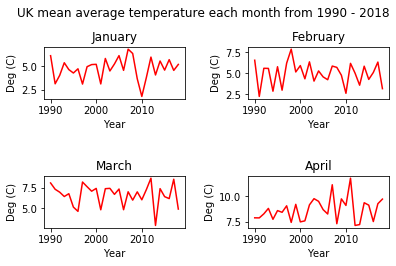

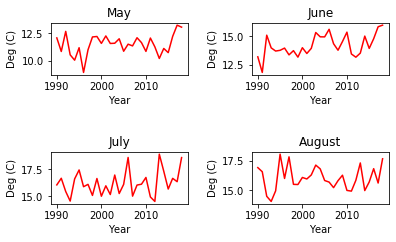

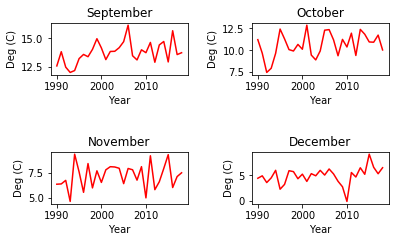

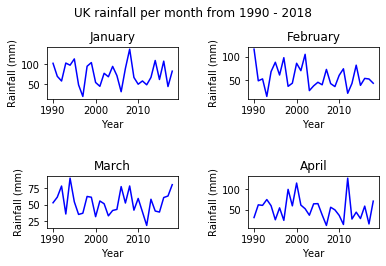

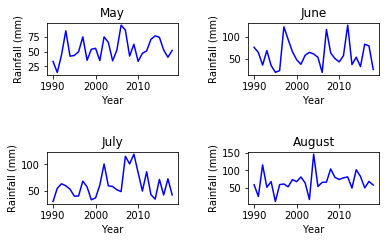

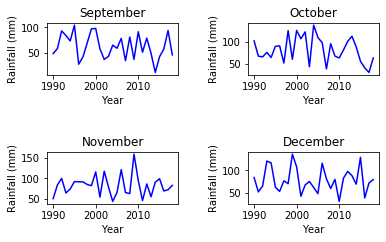

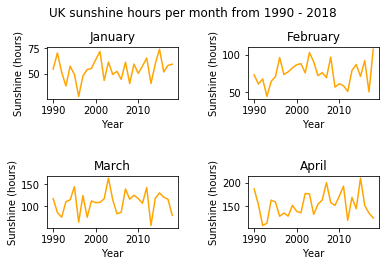

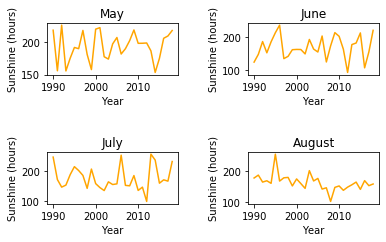

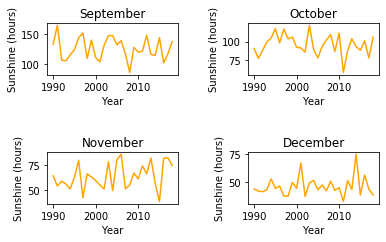

In [210]:
from matplotlib import pyplot as plt

#This gets a data table for each unique month from 1990 - 2018 e.g. the first line of code gets a table for
#the data of every january from 1990 - 2018

january = final_uk_climate[final_uk_climate.mm == 1]
february = final_uk_climate[final_uk_climate.mm == 2]
march = final_uk_climate[final_uk_climate.mm == 3]
april = final_uk_climate[final_uk_climate.mm == 4]
may = final_uk_climate[final_uk_climate.mm == 5]
june = final_uk_climate[final_uk_climate.mm == 6]
july = final_uk_climate[final_uk_climate.mm == 7]
august = final_uk_climate[final_uk_climate.mm == 8]
september = final_uk_climate[final_uk_climate.mm == 9]
october = final_uk_climate[final_uk_climate.mm == 10]
november = final_uk_climate[final_uk_climate.mm == 11]
december = final_uk_climate[final_uk_climate.mm == 12]

#The code below plots all the graphs for each month against either mean temperature, rainfall or sunshine hours overtime

fig1 = plt.figure(1)
fig1.suptitle('UK mean average temperature each month from 1990 - 2018')
plt.subplot(2,2,1)
plt.plot(january.yyyy, january.tmeanUK_degC, color = 'red')
plt.title('January')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,2)
plt.plot(february.yyyy, february.tmeanUK_degC, color = 'red')
plt.title('February')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,3)
plt.plot(march.yyyy, march.tmeanUK_degC, color = 'red')
plt.title('March')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,4)
plt.plot(april.yyyy, april.tmeanUK_degC, color = 'red')
plt.title('April')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
fig1.tight_layout(pad = 3)

fig2 = plt.figure(2)
plt.subplot(2,2,1)
plt.plot(may.yyyy, may.tmeanUK_degC, color = 'red')
plt.title('May')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,2)
plt.plot(june.yyyy, june.tmeanUK_degC, color = 'red')
plt.title('June')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,3)
plt.plot(july.yyyy, july.tmeanUK_degC, color = 'red')
plt.title('July')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,4)
plt.plot(august.yyyy, august.tmeanUK_degC, color = 'red')
plt.title('August')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
fig2.tight_layout(pad = 3)

fig3 = plt.figure(3)
plt.subplot(2,2,1)
plt.plot(september.yyyy, september.tmeanUK_degC, color = 'red')
plt.title('September')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,2)
plt.plot(october.yyyy, october.tmeanUK_degC, color = 'red')
plt.title('October')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,3)
plt.plot(november.yyyy, november.tmeanUK_degC, color = 'red')
plt.title('November')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
plt.subplot(2,2,4)
plt.plot(december.yyyy, december.tmeanUK_degC, color = 'red')
plt.title('December')
plt.xlabel('Year')
plt.ylabel('Deg (C)')
fig3.tight_layout(pad = 3)

fig4 = plt.figure(4)
fig4.suptitle('UK rainfall per month from 1990 - 2018')
plt.subplot(2,2,1)
plt.plot(january.yyyy, january.rainUK_mm, color = 'blue')
plt.title('January')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,2)
plt.plot(february.yyyy, february.rainUK_mm, color = 'blue')
plt.title('February')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,3)
plt.plot(march.yyyy, march.rainUK_mm, color = 'blue')
plt.title('March')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,4)
plt.plot(april.yyyy, april.rainUK_mm, color = 'blue')
plt.title('April')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
fig4.tight_layout(pad = 3)

fig5 = plt.figure(5)
plt.subplot(2,2,1)
plt.plot(may.yyyy, may.rainUK_mm, color = 'blue')
plt.title('May')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,2)
plt.plot(june.yyyy, june.rainUK_mm, color = 'blue')
plt.title('June')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,3)
plt.plot(july.yyyy, july.rainUK_mm, color = 'blue')
plt.title('July')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,4)
plt.plot(august.yyyy, august.rainUK_mm, color = 'blue')
plt.title('August')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
fig5.tight_layout(pad = 3)

fig6 = plt.figure(6)
plt.subplot(2,2,1)
plt.plot(september.yyyy, september.rainUK_mm, color = 'blue')
plt.title('September')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,2)
plt.plot(october.yyyy, october.rainUK_mm, color = 'blue')
plt.title('October')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,3)
plt.plot(november.yyyy, november.rainUK_mm, color = 'blue')
plt.title('November')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.subplot(2,2,4)
plt.plot(december.yyyy, december.rainUK_mm, color = 'blue')
plt.title('December')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
fig6.tight_layout(pad = 3)

fig7 = plt.figure(7)
fig7.suptitle('UK sunshine hours per month from 1990 - 2018')
plt.subplot(2,2,1)
plt.plot(january.yyyy, january.sunUK_hours, color = 'orange')
plt.title('January')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,2)
plt.plot(february.yyyy, february.sunUK_hours, color = 'orange')
plt.title('February')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,3)
plt.plot(march.yyyy, march.sunUK_hours, color = 'orange')
plt.title('March')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,4)
plt.plot(april.yyyy, april.sunUK_hours, color = 'orange')
plt.title('April')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
fig7.tight_layout(pad = 3)

fig8 = plt.figure(8)
plt.subplot(2,2,1)
plt.plot(may.yyyy, may.sunUK_hours, color = 'orange')
plt.title('May')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,2)
plt.plot(june.yyyy, june.sunUK_hours, color = 'orange')
plt.title('June')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,3)
plt.plot(july.yyyy, july.sunUK_hours, color = 'orange')
plt.title('July')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,4)
plt.plot(august.yyyy, august.sunUK_hours, color = 'orange')
plt.title('August')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
fig8.tight_layout(pad = 3)

fig9 = plt.figure(9)
plt.subplot(2,2,1)
plt.plot(september.yyyy, september.sunUK_hours, color = 'orange')
plt.title('September')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,2)
plt.plot(october.yyyy, october.sunUK_hours, color = 'orange')
plt.title('October')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,3)
plt.plot(november.yyyy, november.sunUK_hours, color = 'orange')
plt.title('November')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.subplot(2,2,4)
plt.plot(december.yyyy, december.sunUK_hours, color = 'orange')
plt.title('December')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
fig9.tight_layout(pad = 3)


### 4. Visual findings and further analysis
Graphs were created showcasing the trends in how the average UK temperature, rainfall and hours of sunshine has changed in every month from the year 1990 to 2018. From visual inspection it can be seen that certain months have had an increase or decrease in one of the 3 variables measured overtime. So for example it can be seen that in the month of June with respect to the average temperature variable there has been a positive trend in the increase of the UK temperature and in the month of February with respect to the variable rainfall there has been a negative trend in the decrease of rainfall overtime. However, with most of the graphs it was a lot harder to see if there is a positive or negative trend at all as there is a lot of fluctuation in the graphs overtime so it’s difficult to see any trend by visual inspection. Further analysis was conducted by first visualising how the UK climate has changed yearly according to the 3 variables as this required some averaging which reduced the effect of extremely high or extremely low values reducing fluctuation, therefore giving a better representation through visualisation on how the UK climate has changed. For UK average temperature this was found by finding the mean of the temperature of every month in a year. The rainfall was found in the same way through a mean however for hours of sunshine the graphs represented the amount of sunshine that the whole of the U.K. receives on average per month. So the yearly sunshine was found by getting a sum of every month in each individual year.

In [211]:
#The code below creates a table for the yearly UK data from the monthly data

year1990sun = final_uk_climate.loc[0:11].sum(axis=0)
year1991sun = final_uk_climate.loc[12:23].sum(axis=0)
year1992sun = final_uk_climate.loc[24:35].sum(axis=0)
year1993sun = final_uk_climate.loc[36:47].sum(axis=0)
year1994sun = final_uk_climate.loc[48:59].sum(axis=0)
year1995sun = final_uk_climate.loc[60:71].sum(axis=0)
year1996sun = final_uk_climate.loc[72:83].sum(axis=0)
year1997sun = final_uk_climate.loc[84:95].sum(axis=0)
year1998sun = final_uk_climate.loc[96:107].sum(axis=0)
year1999sun = final_uk_climate.loc[108:119].sum(axis=0)
year2000sun = final_uk_climate.loc[120:131].sum(axis=0)
year2001sun = final_uk_climate.loc[132:143].sum(axis=0)
year2002sun = final_uk_climate.loc[144:155].sum(axis=0)
year2003sun = final_uk_climate.loc[156:167].sum(axis=0)
year2004sun = final_uk_climate.loc[168:179].sum(axis=0)
year2005sun = final_uk_climate.loc[180:191].sum(axis=0)
year2006sun = final_uk_climate.loc[192:203].sum(axis=0)
year2007sun = final_uk_climate.loc[204:215].sum(axis=0)
year2008sun = final_uk_climate.loc[216:227].sum(axis=0)
year2009sun = final_uk_climate.loc[228:239].sum(axis=0)
year2010sun = final_uk_climate.loc[240:251].sum(axis=0)
year2011sun = final_uk_climate.loc[252:263].sum(axis=0)
year2012sun = final_uk_climate.loc[264:275].sum(axis=0)
year2013sun = final_uk_climate.loc[276:287].sum(axis=0)
year2014sun = final_uk_climate.loc[288:299].sum(axis=0)
year2015sun = final_uk_climate.loc[300:311].sum(axis=0)
year2016sun = final_uk_climate.loc[312:323].sum(axis=0)
year2017sun = final_uk_climate.loc[324:335].sum(axis=0)
year2018sun = final_uk_climate.loc[336:347].sum(axis=0)
yearly_average_sun = pd.concat([year1990sun, year1991sun, year1992sun, year1993sun, year1994sun, year1995sun, year1996sun, 
year1997sun, year1998sun, year1999sun, year2000sun, year2001sun, year2002sun, year2003sun, year2004sun, year2005sun, 
year2006sun, year2007sun, year2008sun, year2009sun, year2010sun, year2011sun, year2012sun, year2013sun, year2014sun, 
year2015sun, year2016sun, year2017sun, year2018sun],axis = 1)
yearly_average_sun = yearly_average_sun.transpose()
yearly_average_sun = yearly_average_sun
yearly_average_sun = yearly_average_sun.drop(['mm','yyyy','tmeanUK_degC','rainUK_mm'], axis = 1)

year1990 = final_uk_climate.loc[0:11].mean(axis=0)
year1991 = final_uk_climate.loc[12:23].mean(axis=0)
year1992 = final_uk_climate.loc[24:35].mean(axis=0)
year1993 = final_uk_climate.loc[36:47].mean(axis=0)
year1994 = final_uk_climate.loc[48:59].mean(axis=0)
year1995 = final_uk_climate.loc[60:71].mean(axis=0)
year1996 = final_uk_climate.loc[72:83].mean(axis=0)
year1997 = final_uk_climate.loc[84:95].mean(axis=0)
year1998 = final_uk_climate.loc[96:107].mean(axis=0)
year1999 = final_uk_climate.loc[108:119].mean(axis=0)
year2000 = final_uk_climate.loc[120:131].mean(axis=0)
year2001 = final_uk_climate.loc[132:143].mean(axis=0)
year2002 = final_uk_climate.loc[144:155].mean(axis=0)
year2003 = final_uk_climate.loc[156:167].mean(axis=0)
year2004 = final_uk_climate.loc[168:179].mean(axis=0)
year2005 = final_uk_climate.loc[180:191].mean(axis=0)
year2006 = final_uk_climate.loc[192:203].mean(axis=0)
year2007 = final_uk_climate.loc[204:215].mean(axis=0)
year2008 = final_uk_climate.loc[216:227].mean(axis=0)
year2009 = final_uk_climate.loc[228:239].mean(axis=0)
year2010 = final_uk_climate.loc[240:251].mean(axis=0)
year2011 = final_uk_climate.loc[252:263].mean(axis=0)
year2012 = final_uk_climate.loc[264:275].mean(axis=0)
year2013 = final_uk_climate.loc[276:287].mean(axis=0)
year2014 = final_uk_climate.loc[288:299].mean(axis=0)
year2015 = final_uk_climate.loc[300:311].mean(axis=0)
year2016 = final_uk_climate.loc[312:323].mean(axis=0)
year2017 = final_uk_climate.loc[324:335].mean(axis=0)
year2018 = final_uk_climate.loc[336:347].mean(axis=0)

yearly_average = pd.concat([year1990, year1991, year1992, year1993, year1994, year1995, year1996, year1997, year1998, year1999,
year2000, year2001, year2002, year2003, year2004, year2005, year2006, year2007, year2008, year2009, year2010, year2011, 
year2012, year2013, year2014, year2015, year2016, year2017, year2018],axis = 1)
yearly_average = yearly_average.transpose()
yearly_average = yearly_average.drop(['mm','sunUK_hours'], axis = 1)
yearly_average = yearly_average.astype({'yyyy': int})
yearly_average['sunUK_hours'] = yearly_average_sun
yearly_average

,yyyy,tmeanUK_degC,rainUK_mm,sunUK_hours
0,1990,10.117262,65.405952,1529.871429
1,1991,9.267857,55.319048,1372.842857
2,1992,9.399405,69.383333,1324.528571
3,1993,9.027381,69.898810,1242.628571
4,1994,9.539286,70.078571,1433.514286
5,1995,9.976786,62.061905,1646.271429
6,1996,9.095734,52.910833,1480.680952
7,1997,10.216667,64.035317,1447.500000
8,1998,9.996032,73.562698,1298.361905
9,1999,10.142361,72.557143,1438.471429


Text(0, 0.5, 'Sunshine (hours)')

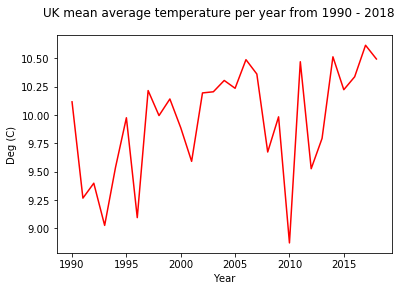

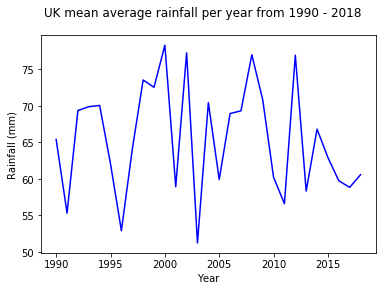

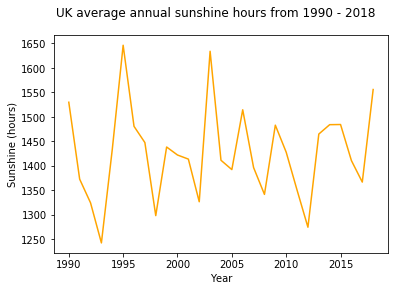

In [212]:
fig1 = plt.figure(1)
fig1.suptitle('UK mean average temperature per year from 1990 - 2018')
plt.subplot(1,1,1)
plt.plot(yearly_average.yyyy, yearly_average.tmeanUK_degC, color = 'red')
plt.xlabel('Year')
plt.ylabel('Deg (C)')

fig2 = plt.figure(2)
fig2.suptitle('UK mean average rainfall per year from 1990 - 2018')
plt.subplot(1,1,1)
plt.plot(yearly_average.yyyy, yearly_average.rainUK_mm, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')


fig3 = plt.figure(3)
fig3.suptitle('UK average annual sunshine hours from 1990 - 2018')
plt.subplot(1,1,1)
plt.plot(yearly_average.yyyy, yearly_average.sunUK_hours, color = 'orange')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')

After averaging the yearly temperature, rainfall and sunshine hours became more clear through visual inspection of the graphs that there may be a positive trend in how the mean temperatures are changing in the U.K where the graphs seem to indicate that the average temperature had increased from 1990-2018. In a yearly average it was still difficult to tell whether there is a trend at all in how the rainfall and sunshine hours have changed from 1990 to 2018. 
### 5. Linear regression analysis
To further analyse whether the UK climate is definitively changing I quantitatively identified a trend in the U.K. climate from 1990 - 2018 by using an analysis technique called Linear Regression. This allowed me to numerically see if there is correlation in how the U.K. climate is changing.

In [213]:
from sklearn.linear_model import LinearRegression
x = yearly_average['yyyy'].to_numpy()
x = x.reshape(-1,1)

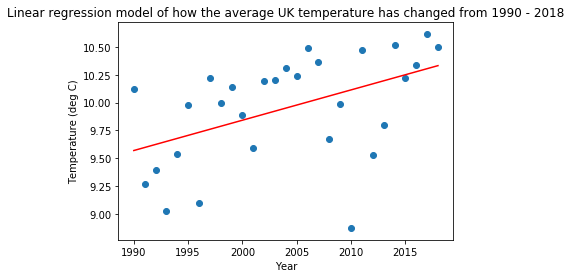

array([0.02716485])

In [214]:
#Creates a linear regression model for temperature overtime
y1 = yearly_average['tmeanUK_degC'].to_numpy()
linreg1 = LinearRegression()
linreg1.fit(x,y1)
y1_pred = linreg1.predict(x)
plt.scatter(x,y1)
plt.plot(x, y1_pred, color = 'red')
plt.title('Linear regression model of how the average UK temperature has changed from 1990 - 2018')
plt.xlabel('Year')
plt.ylabel('Temperature (deg C)')
plt.show()
linreg1.coef_ 

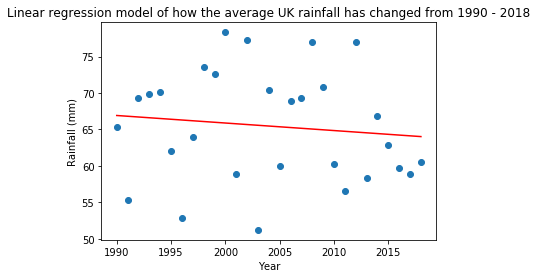

array([-0.10331758])

In [215]:
##Creates a linear regression model for rainfall overtime
y2 = yearly_average['rainUK_mm'].to_numpy()
linreg2 = LinearRegression()
linreg2.fit(x,y2)
y2_pred = linreg2.predict(x)
plt.title('Linear regression model of how the average UK rainfall has changed from 1990 - 2018')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.scatter(x,y2)
plt.plot(x, y2_pred, color = 'red')
plt.show()
linreg2.coef_

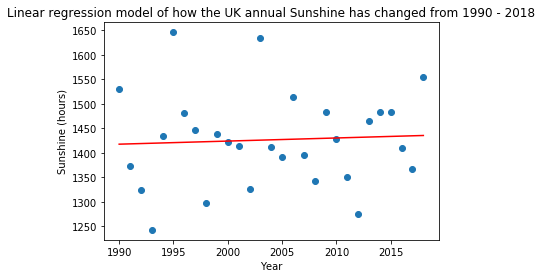

array([0.63382864])

In [216]:
##Creates a linear regression model for sunshine overtime
y3 = yearly_average['sunUK_hours'].to_numpy()
linreg3 = LinearRegression()
linreg3.fit(x,y3)
y3_pred = linreg3.predict(x)
plt.title('Linear regression model of how the UK annual Sunshine has changed from 1990 - 2018')
plt.xlabel('Year')
plt.ylabel('Sunshine (hours)')
plt.scatter(x,y3)
plt.plot(x, y3_pred, color = 'red')
plt.show()
linreg3.coef_

### 6. Linear regression findings
The linear regression model creates the best prediction line possible with the data at hand for the each of the 3 variables. A steeper line shows greater correlation over the years in how one of the 3 variables may have changed over the years and also indicates whether there has been a significant change. The numerical analysis seemed to be in line with the visual inspection earlier on with the line graphs. The linear regression model for the average temperature had the steepest slope of the 3 variables and seemed to indicate that there had been a significant change in the average U.K. temperature over the years. Although there is a slope for the average rainfall and the annual sunshine these slopes are very minute and seemed to be well within the natural margin of variability that exists in the climate and does not seem to indicate at first hand a significant change in the U.K. average rainfall per year and annual sunshine hours. This point is further backed up by visually inspecting the error between the slopes and the points, the error between the points and the slopes seemed much greater by looking at the linear regression models and the figures of their variables in annual sunshine and average rainfall compared to mean temperature. When there is a greater error the regression line produced is less reliable.
### 7. T-test analysis
To finally conclude within this model whether the correlation showed by the linear regression model was significant deeming that there has been a change in the U.K. climate a t-test was used as a final analysis technique. The t-test is a technique used to determine if there is a significant difference between the mean of two groups. There is a null and alternative hypothesis; the null hypothesis is that the groups are similar, and the alternative hypothesis is that the groups are significantly different. A high t-value (3 or greater) indicates that there is a significant difference between the 2 groups of mean and a low t-value indicates that the 2 groups are similar. Every t-value comes with an associated p-value which indicates how likely it is for significant result to happen by luck so a p-value of 0.1 indicates that there is a 10% probability that a result happened by chance. A low p-value is a good sign and in most cases a p-value less than 0.05 (5%) is a good benchmark that demonstrates the data is valid and indicates strong evidence against the null hypothesis. Since a group mean is required to reduce variation of data I used the years of 1990-1995 for the before climate change group and 2013-2018 for the after climate change group as this was a good range to get an average mean for the 2 groups and also allowed enough time to pass to see if there had been a significant change overtime in the climate.

In [217]:
from scipy import stats

In [218]:
#t - test for if the UK mean temperature has changed significantly from the past to the present
temperature_before = yearly_average.drop(['yyyy','rainUK_mm', 'sunUK_hours'], axis=1)
temperature_before = temperature_before.loc[0:5]

temperature_after = yearly_average.drop(['yyyy','rainUK_mm', 'sunUK_hours'], axis=1)
temperature_after = temperature_after.loc[23:28]
stats.ttest_rel(temperature_after, temperature_before)

Ttest_relResult(statistic=array([3.1045281]), pvalue=array([0.02671578]))

In [219]:
#t - test for if the UK average rainfall has changed significantly from the past to the present
rain_before = yearly_average.drop(['yyyy','tmeanUK_degC', 'sunUK_hours'], axis=1)
rain_before = rain_before.loc[0:5]

rain_after = yearly_average.drop(['yyyy','tmeanUK_degC', 'sunUK_hours'], axis=1)
rain_after = rain_after.loc[23:28]
stats.ttest_rel(rain_before, rain_after)

Ttest_relResult(statistic=array([1.2092256]), pvalue=array([0.28062991]))

In [220]:
#t - test for if the UK annual sunshine hours has changed significantly from the past to the present
sunshine_before = yearly_average.drop(['yyyy','rainUK_mm', 'tmeanUK_degC'], axis=1)
sunshine_before = sunshine_before.loc[0:5]

sunshine_after = yearly_average.drop(['yyyy','rainUK_mm', 'tmeanUK_degC'], axis=1)
sunshine_after = sunshine_after.loc[23:28]
stats.ttest_rel(sunshine_after, sunshine_before)

Ttest_relResult(statistic=array([0.72313162]), pvalue=array([0.50199999]))

### 8. Conclusions and implications
The t-test confirmed what the previous visual analysis and linear regression analysis suggested, that there is significant climate change taking place with regards to the temperatures in the U.K. rising significantly from just 1990. This was because there was a t-value greater than 3 and p-value less than 0.05, however there wasn’t any significant change taking place with the UK rainfall and annual sunshine hours with them both having a t-value below 3 and a p-value above 0.05.

This model finds that climate change has taken place from as recently as 1990 with the average UK temperature having risen significantly. These findings go along with the scientific consensus that climate change is taking place with global warming (rising temperatures) being the culprit [5]. The implications from this model are negative for the UK with significant increases in temperatures resulting in rising sea levels increasing risk of floods, reduction in agriculture, reduction in wildlife and more [6]. These findings support the governments priority in adapting to climate change, however it may contradict the goal set by the government originally before changing in June of this year which was to reduce greenhouse gas emissions by 80% from 1990. Greenhouse gas emissions have been cited to be the main cause of global warming [7] in this present day so a rise in the UK temperatures from 1990 indicate that greenhouse gas emissions have actually increased from 1990 going against the government goal of decreasing the emissions. However correlation is not equal to causation so although this is implied it’s possible that the man made greenhouse gas emissions have actually decreased but there may be other factors at play as to why the UK temperatures have increased significantly. This may include an increase in greenhouse emissions from natural factors such as rising human populations and animal agriculture from 1990. There may also have been a reduction in things which reduce the greenhouse gases in the environment such as trees and plants which reduce Co2 (a greenhouse gase) in the environment so even if the man made greenhouse emissions have decreased the net total greenhouse gases in the atmosphere may have increased due to these and other factors. With the implications of this model it’s important to adapt to climate change to counteract the negative effects in significantly rising temperatures and the UK government is doing so now by making this a priority.
### 9. Strengths of the investigation
A major strength of this investigation is the analysis techniques done in identifying whether a significant change had taken place with the data provided. The yearly averages were found, and the data visualisations showed increases in the UK temperature had taken place whereas the rainfall and sunshine hours were similar across the time frame. A linear regression model was then used to quantify any significant changes which supported the original visual inspection and demonstrated an increase in the temperatures and the regression lines for rainfall and sunshine hours being extremely minute in steepness indicating that no change had taken place overtime. This was then confirmed with a t-test which gave a significant difference for the mean temperatures from the early 1990s group and late 2010s group due to a high t-value and strong evidence for this due to a low p-value. The exact opposite case happened for rainfall and sunshine hours showing no significant difference overtime with low t and high p-values. All these techniques reinforced each other’s findings meaning confidence can be placed in the analysis of the given data. With regards to the data selection there were some strengths in this aspect of the model. One strength was in the data selection criteria, making sure to collect stations from all over the UK to accurately portray its climate. Another strength was choosing a relevant timeframe for the data with 1990 as a starting point being a relevant date to the government goals in adapting to climate change and making sure to choose stations which are currently open to see how the climate has changed to present day.

### 10. Weaknesses and future improvements
One weakness with this model was that a normaility test was not conducted on the data and in a t-test the ideal conidition is that the data is normally distributed. A future improvemnt would be to conduct a normality test on the data used and if test showed that the data was normally distributed this would further increase the confidence and reliability in the analysis whereas a test showing non-normally distributed data would decrease the reliability and confidence in the analysis.

Another weakness with this model may be what data was collected. A lot of the stations chosen for data in this investigation had only predicted values for the 3 variables. For example, the stations 'Nairn' and 'Paisley' only had predicted or null values for the UK temperature for 70-80 of the months within 1990-2018 and you can see this by looking earlier at the investigation when the "isnull().sum()" was found for each station (section 2.2) there were a lot of null values after the predicted values were removed and when looking at the completely cleaned up tables for the stations these tables seem to indicate the most recent years as the values for 2018 were null. So, with the process of nulling these predicted values to get an accurate representation of the UK recorded weather when it came to averaging in the most recent years their values were not taken into consideration. Considering that Scotland is generally the coldest part of the UK [8] not having their values included in the mean average for possibly the most recent years may have possibly skewed the temperatures higher in favour of the hotter parts of the UK meaning that the recorded recent temperature may be higher than the actual UK average. So a potential improvement to this model would be to use the estimated data for these stations to get a better representation of how to entire UK mean average temperature is in these most recent years or even take the Scotland data from other stations which include recently recorded values. An obvious improvement would have been to use more stations as well to get an even more reliable average so for a future model which doesn’t have the same time constraints this should be a consideration. These predicted values were a much bigger problem with regards to sunshine hours when looking at the "isnull().sum()" 4 of the stations had over 100 null values for sunshine hours so the improvement of using different stations with more recorded values will apply here as well. However, from the analysis of sunshine hours this had the least correlation overtime and worst results in the t-test of the 3 variables so even having more recorded values for sunshine hours will most likely give the same results.
### 11. References
[1] https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data 
[2] https://www.gov.uk/government/news/uk-becomes-first-major-economy-to-pass-net-zero-emissions-law
[3] https://earthobservatory.nasa.gov/features/GlobalWarming/page2.php
[4] https://en.wikipedia.org/wiki/Countries_of_the_United_Kingdom
[5] https://skepticalscience.com/global-warming-scientific-consensus-intermediate.htm
[6] https://www.countryfile.com/news/what-is-the-impact-of-climate-change/
[7] https://svs.gsfc.nasa.gov/20114
[8] http://www.foreignstudents.com/guide-to-britain/british-culture/weather/location